# `01` import  libraries

In [267]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn import datasets as DB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler ,StandardScaler

from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB





# `02` load data

In [239]:
iris=DB.load_iris()  # dictionary 
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [240]:
iris.data # == iris['data']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [241]:
iris.feature_names  # ==iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [242]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [243]:
pd.DataFrame(iris.data,columns=iris.feature_names)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [244]:
! dir frui*

 Volume in drive C has no label.
 Volume Serial Number is 414B-A760

 Directory of C:\Users\ALL IN ONE\OneDrive - Assuit University\jupter\ML1

01/10/2025  09:07 PM             2,370 fruit_data_with_colors.txt
01/10/2025  08:59 PM             2,334 fruit_data_with_colours.csv
               2 File(s)          4,704 bytes
               0 Dir(s)  38,998,310,912 bytes free


In [245]:
fruits=pd.read_csv('fruit_data_with_colours.csv')
fruits.head(3)


,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60


# `03` EDA

In [246]:
fruits.shape

(59, 7)

In [247]:
np.unique(fruits['fruit_name'])  # or fruits['fruit_name'].unique()

array(['apple', 'lemon', 'mandarin', 'orange'], dtype=object)

In [248]:
fruits.info()      # in DF  object is string   , no null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fruit_label    59 non-null     int64  
 1   fruit_name     59 non-null     object 
 2   fruit_subtype  59 non-null     object 
 3   mass           59 non-null     int64  
 4   width          59 non-null     float64
 5   height         59 non-null     float64
 6   color_score    59 non-null     float64
dtypes: float64(3), int64(2), object(2)
memory usage: 3.4+ KB


In [249]:
fruits.isnull().sum()

fruit_label      0
fruit_name       0
fruit_subtype    0
mass             0
width            0
height           0
color_score      0
dtype: int64

In [250]:
fruits.duplicated().sum()  #  duplicated raw

0

In [251]:
fruits.drop_duplicates(inplace=True)


### what is task    classifcation or regration    know it from label if  label is  num then reg else calss
###   mtuple_calss classification   or  binary_classification    know it from label ==>   mtuple_calss classification عشان اكتر من نوعين 

### من الحجات المهمه خالص انك تشوف  عدد السامبل فى كل كلاس  

In [252]:
fruits.groupby('fruit_name')  # return  object   ,make any function to change object type 
fruits.groupby('fruit_name').size()
#هنلاحظ ان السامبل مختلف فى كل الكلاس  
#الحل لما ازود  السامبل بتاع القليل  او اقلل الكبير  ولو عندى صور هنعمل  
# ugmantion  
#وفى  الكلام  بنعمل حاجه اسمها  
#SMOTE

fruit_name
apple       19
lemon       16
mandarin     5
orange      19
dtype: int64

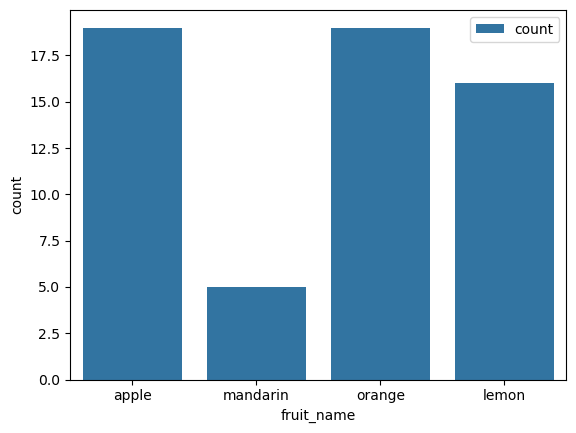

In [253]:
sns.countplot(data=fruits,x=fruits['fruit_name'],label='count');
             

### to know outlayer
## use scatter   if 
## use boxblot   if 

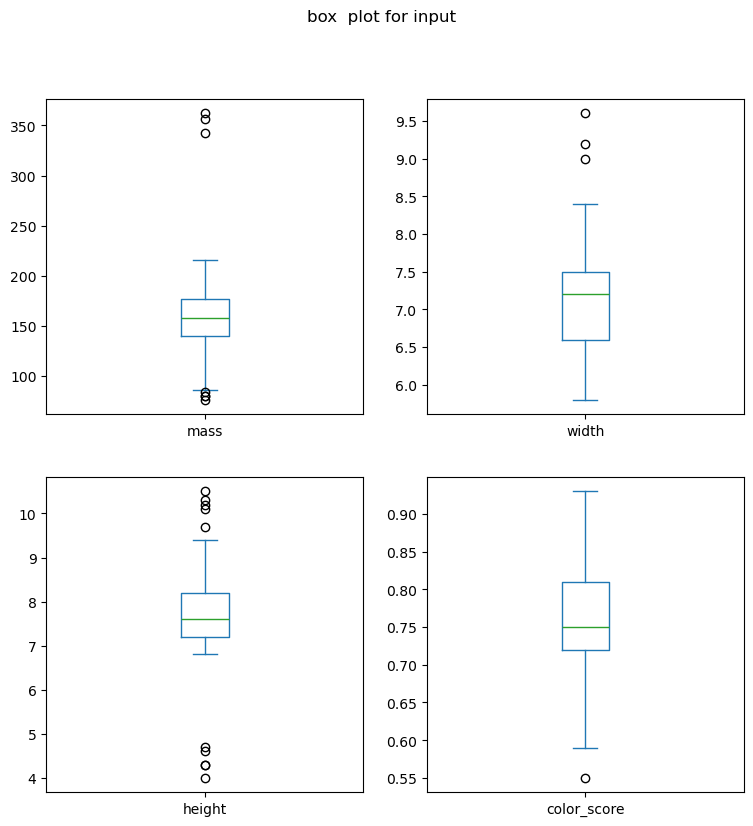

In [254]:
fruits.drop('fruit_label',axis=1).plot(kind='box',
                                      subplots=True,
                                      layout=(2,2),
                                      sharex=False,
                                      sharey=False,
                                      figsize=(9,9),
                                      title='box  plot for input '
                                     
                                     
                                     )
plt.show()

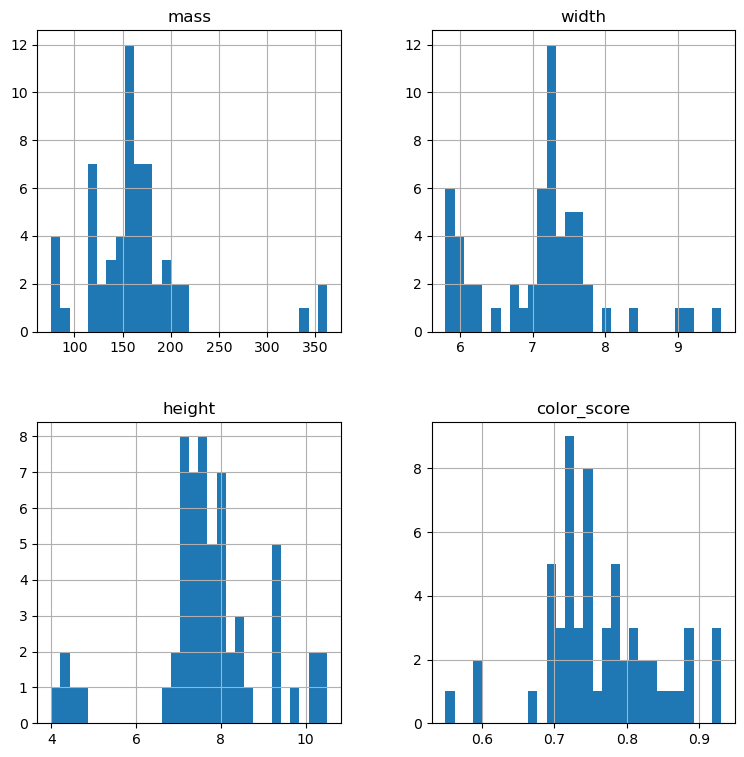

In [255]:
fruits.drop('fruit_label',axis=1).hist(figsize=(9,9),bins=30, )
plt.show()

# هنا عرض اربعه عشان دول الاربع قيم اللى ليهم ارقام 

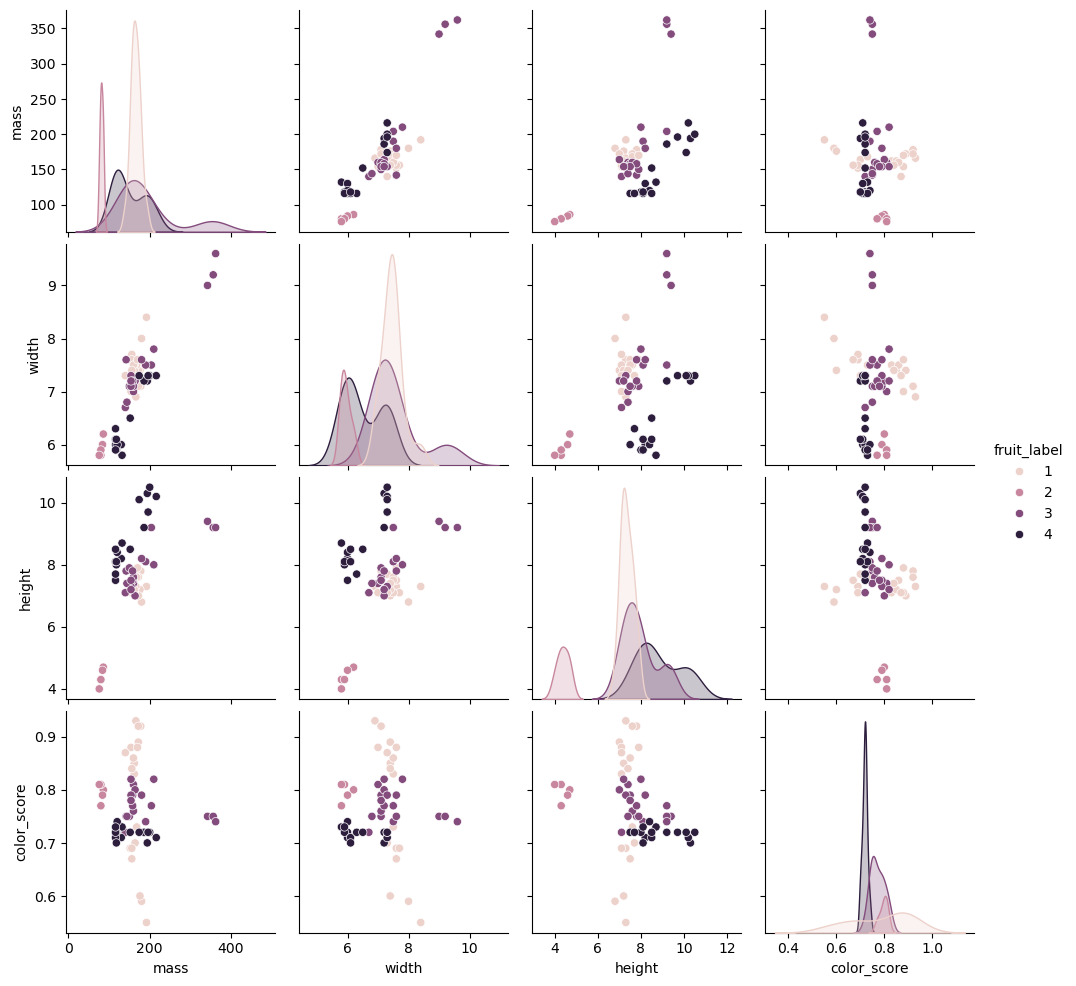

In [256]:
sns.pairplot(fruits,hue='fruit_label')

# من الرسمه دى هتفهم ان احسن  حاجه تستخجاامها  فى  
#classifcation   
#هم العرض والطول    عشان هتلقيهم مفصلين عن بعض   

# `03` Preprocess/transform 

In [257]:
fruits.columns

Index(['fruit_label', 'fruit_name', 'fruit_subtype', 'mass', 'width', 'height',
       'color_score'],
      dtype='object')

In [292]:

X=fruits[[ 'mass', 'width', 'height','color_score']]
y=fruits['fruit_label']
X

,mass,width,height,color_score
0,192,8.4,7.3,0.55
1,180,8.0,6.8,0.59
2,176,7.4,7.2,0.60
3,86,6.2,4.7,0.80
4,84,6.0,4.6,0.79
5,80,5.8,4.3,0.77
6,80,5.9,4.3,0.81
7,76,5.8,4.0,0.81
8,178,7.1,7.8,0.92
9,172,7.4,7.0,0.89


In [293]:
# random_state  = any Number  but usuale use 0 or 42
# test_size=.2  mean test size =20% and train 80% 
#shuffling  by defaut true
# stratify=None  بتحافظ على نسبه توزيع زى اللى وخدها ==>  لو عندى نوع فاكه  كان اقل من الباقى  هيحافظ على  نسبه بين النوع الاقل والباقى فى التوزيع الناتج 
X_train,X_test,y_train,y_test,=train_test_split(X,y,test_size=.2,random_state=0,stratify=fruits['fruit_name'])
X_test

,mass,width,height,color_score
49,132,5.8,8.7,0.73
31,210,7.8,8.0,0.82
25,356,9.2,9.2,0.75
3,86,6.2,4.7,0.80
17,168,7.5,7.6,0.73
50,130,6.0,8.2,0.71
38,158,7.2,7.8,0.77
24,342,9.0,9.4,0.75
57,152,6.5,8.5,0.72
20,160,7.5,7.5,0.86


# `4 ` Normazation 

In [294]:
scalar=MinMaxScaler()    # range  [0,1] 
#scalar= StandardScaler()        #rang    [-1,1]

#fit for scalar   and transform for X_train 
scalar=scalar.fit(X_train)                  # set (min ,max) paramter for class MinMaxScaler    
X_train=scalar.transform(X_train)           #  change   range of   number   or 
X_test=scalar.transform(X_test) 

X_test

array([[ 0.1958042 ,  0.        ,  0.72307692,  0.41176471],
       [ 0.46853147,  0.52631579,  0.61538462,  0.67647059],
       [ 0.97902098,  0.89473684,  0.8       ,  0.47058824],
       [ 0.03496503,  0.10526316,  0.10769231,  0.61764706],
       [ 0.32167832,  0.44736842,  0.55384615,  0.41176471],
       [ 0.18881119,  0.05263158,  0.64615385,  0.35294118],
       [ 0.28671329,  0.36842105,  0.58461538,  0.52941176],
       [ 0.93006993,  0.84210526,  0.83076923,  0.47058824],
       [ 0.26573427,  0.18421053,  0.69230769,  0.38235294],
       [ 0.29370629,  0.44736842,  0.53846154,  0.79411765],
       [ 0.40559441,  0.68421053,  0.50769231, -0.11764706],
       [ 0.35664336,  0.34210526,  0.58461538,  0.97058824]])

# `5` Model Creation   

### logistic Regration 


In [295]:
# create model    with random theate    need to fit 
logreg=LogisticRegression()
logreg


LogisticRegression()

In [297]:
# set value for  theates
logreg=logreg.fit(X_train,y_train)

y_test

49    4
31    3
25    3
3     2
17    1
50    4
38    3
24    3
57    4
20    1
0     1
8     1
Name: fruit_label, dtype: int64

In [299]:
# 
logreg.predict(X_test)

array([4, 1, 3, 1, 3, 4, 3, 3, 4, 1, 3, 1], dtype=int64)

In [300]:
logreg.predict_proba(X_test)

array([[0.17525701, 0.07246268, 0.22214925, 0.53013106],
       [0.39636416, 0.04432842, 0.39179064, 0.16751678],
       [0.37776031, 0.01105707, 0.48787495, 0.12330768],
       [0.35426044, 0.23771548, 0.2556815 , 0.15234258],
       [0.3448091 , 0.06078801, 0.35285437, 0.24154852],
       [0.19655261, 0.08115439, 0.23788745, 0.48440555],
       [0.33707056, 0.06697876, 0.3405825 , 0.25536818],
       [0.3635583 , 0.0120208 , 0.47817781, 0.14624309],
       [0.22840209, 0.06350945, 0.27668595, 0.43140251],
       [0.41731881, 0.06694574, 0.36029908, 0.15543637],
       [0.32142093, 0.04104888, 0.37352434, 0.26400584],
       [0.40958855, 0.06860494, 0.36164098, 0.16016553]])

In [301]:
# Eveluation  

logreg.score(X_train,y_train)

0.6382978723404256

In [291]:
logreg.score(X_test,y_test)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


0.3333333333333333

### DecisionTreeClassifier 

In [302]:
model=DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [284]:
model.score(X_train,y_train)

1.0

In [286]:
model.score(X_test,y_test)

0.9166666666666666

### KnighberClassisier

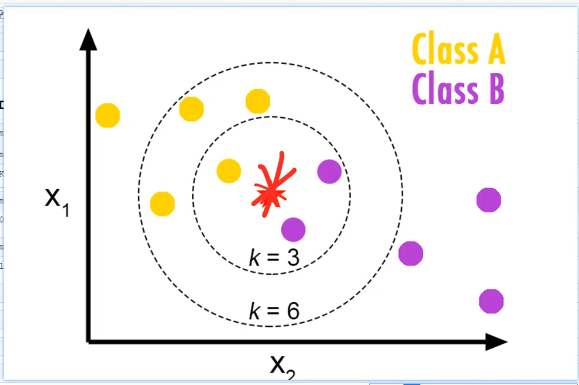

In [304]:
model=KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,y_train)

KNeighborsClassifier()

In [305]:
model.score(X_train,y_train)

1.0

In [306]:
model.score(X_test,y_test)

0.8333333333333334

### try   value of paramter  for pramter for best model 

In [315]:
k_range=range(1,20)
score_train =[]
score_test=[]
for k in k_range:
    model=KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train,y_train)
    score_train.append( model.score(X_train,y_train))
    score_test.append( model.score(X_test,y_test))



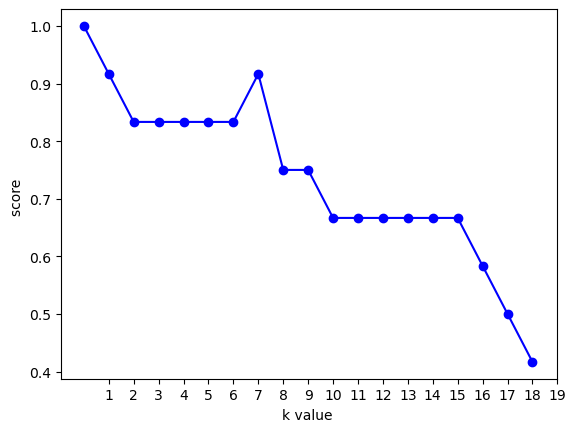

In [318]:
plt.figure()

plt.plot(score_test,'bo-')
plt.xlabel('k value ')
plt.ylabel('score ')
plt.xticks(k_range)
plt.show()

In [329]:
# make   fixed   and 
split_range=np.linspace(.1,.9,num=9)

score_train =[]
score_test=[]
for s in split_range:
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=s)
    model=KNeighborsClassifier(n_neighbors=5)
    model.fit(X_train,y_train)
    score_train.append( model.score(X_train,y_train))
    score_test.append( model.score(X_test,y_test))



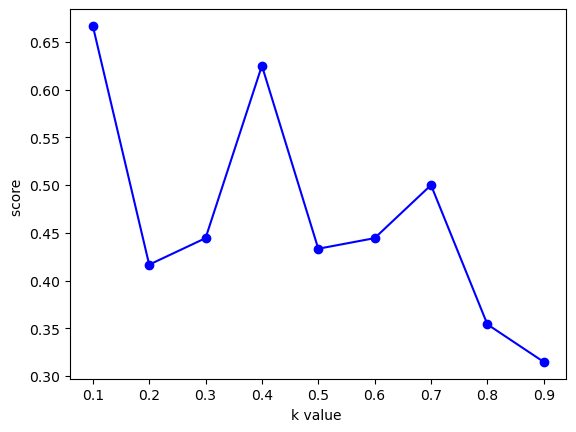

In [330]:
plt.figure()

plt.plot(split_range,score_test,'bo-')
plt.xlabel('k value ')
plt.ylabel('score ')
plt.show()